In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.6
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate06'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.95it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.11it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.73it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.90it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.97it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.58it/s]


Validation result: best alpha 0.1, best score 0.8247012462148562, scores {0.0: 1.069102005738277, 0.01: 4.554079953570386, 0.1: 0.8247012462148562, 1.0: 0.8567833550223165, 10.0: 0.9688807154731415, 100.0: 1.0052108955054573}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50.16it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.06it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.83it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.22it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.31it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.03it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.02it/s]


Validation result: best alpha 0.1, best score 0.8247012462148562, scores {0.0: 1.069102005738277, 0.01: 4.554079953570386, 0.1: 0.8247012462148562, 1.0: 0.8567833550223165, 10.0: 0.9688807154731415, 100.0: 1.0052108955054573}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 139.24it/s]


loss 0.33694645850224114
loss 0.26055869268511817
loss 0.2466798850808186
loss 0.25400274888844965
loss 0.24101176643761235
loss 0.25320387681048045
loss 0.25811142832524914
loss 0.2555114272638472
loss 0.25261815622651546
loss 0.2558957997025479
number of runs used by missForest: 10
loss: 0.2558957997025479
loss 0.3487601020402784
loss 0.25136949813252535
loss 0.23641952814931255
loss 0.2564794683832108
loss 0.24499356060130817
loss 0.24331465885558068
loss 0.24035160718030124
loss 0.2529643556638836
loss 0.253674288193875
loss 0.24796505623043505
number of runs used by missForest: 10
loss: 0.24796505623043505



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 604.90it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 1
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.17it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.11it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.45it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.51it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.67it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.69it/s]


Validation result: best alpha 0.1, best score 0.7933387827198297, scores {0.0: 2.0383492351431998, 0.01: 1.4828268490913195, 0.1: 0.7933387827198297, 1.0: 0.843127988825935, 10.0: 0.967540647913215, 100.0: 1.0111623771990996}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.77it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.13it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.48it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.83it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.15it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.41it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.04it/s]


Validation result: best alpha 0.1, best score 0.7933387827198297, scores {0.0: 2.0383492351431998, 0.01: 1.4828268490913195, 0.1: 0.7933387827198297, 1.0: 0.843127988825935, 10.0: 0.967540647913215, 100.0: 1.0111623771990996}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 139.86it/s]


loss 0.3592567604316631
loss 0.24958398939495072
loss 0.21454050081494952
loss 0.2014716062350798
loss 0.19464537363699316
loss 0.19813269641973008
loss 0.20086268361982668
loss 0.20078595674349664
loss 0.2006910564350369
loss 0.20929831484058775
number of runs used by missForest: 10
loss: 0.20929831484058775
loss 0.36331085905194505
loss 0.22983363139081767
loss 0.17178528212071245
loss 0.16675823454704944
loss 0.1727239566263941
loss 0.18138688073459816
loss 0.18822500788177704
loss 0.1939564090537348
loss 0.18816698153372974
loss 0.18845740528984362
number of runs used by missForest: 10
loss: 0.18845740528984362


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 645.60it/s]


iteration: 2
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.71it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.09it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.20it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.40it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.76it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.47it/s]


Validation result: best alpha 1.0, best score 0.8256724550903296, scores {0.0: 3.181920282795937, 0.01: 2.4353885299450284, 0.1: 0.960119971377119, 1.0: 0.8256724550903296, 10.0: 0.9347141841662819, 100.0: 0.9705332247804792}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.24it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.32it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.57it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.32it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.41it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.35it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.39it/s]


Validation result: best alpha 1.0, best score 0.8256724550903296, scores {0.0: 3.181920282795937, 0.01: 2.4353885299450284, 0.1: 0.960119971377119, 1.0: 0.8256724550903296, 10.0: 0.9347141841662818, 100.0: 0.9705332247804792}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 145.98it/s]


loss 0.3598144443533104
loss 0.2354676227261398
loss 0.18007060023236962
loss 0.17384939741862385
loss 0.17921946373852018
loss 0.17969710780732476
loss 0.17109066928527278
loss 0.18076914200665795
loss 0.1807900249109265
loss 0.18667613600331806
number of runs used by missForest: 10
loss: 0.18667613600331806
loss 0.3673894913417448
loss 0.2287837980131711
loss 0.18932566312059843
loss 0.19386158443506799
loss 0.19842646246803422
loss 0.2194282087500039
loss 0.22437640774853568
loss 0.24176927146832156
loss 0.22286357494214204
loss 0.24053899610288165
number of runs used by missForest: 10
loss: 0.24053899610288165


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 659.25it/s]


iteration: 3
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.40it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.17it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.32it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.43it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.84it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.26it/s]


Validation result: best alpha 1.0, best score 0.8370724240810606, scores {0.0: 3.549764275093235, 0.01: 3.5673850638992057, 0.1: 8.01832806345966, 1.0: 0.8370724240810606, 10.0: 0.9520968700095436, 100.0: 0.9909194337744055}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 51.11it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.61it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.20it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.19it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.85it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.43it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.09it/s]


Validation result: best alpha 1.0, best score 0.8370724240810606, scores {0.0: 3.5497642750932346, 0.01: 3.5673850638992057, 0.1: 8.01832806345966, 1.0: 0.8370724240810606, 10.0: 0.9520968700095436, 100.0: 0.9909194337744055}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 136.31it/s]


loss 0.35193937498202005
loss 0.2354591466632079
loss 0.18402368118152643
loss 0.1788125683448825
loss 0.17290040222768296
loss 0.1877086377799967
loss 0.191599387887095
loss 0.20364313953773971
loss 0.202740856464046
loss 0.2107850264790007
number of runs used by missForest: 10
loss: 0.2107850264790007
loss 0.36131385127382776
loss 0.2092015014832264
loss 0.18542411154647423
loss 0.1841447443851282
loss 0.18954800562471324
loss 0.1988316306154605
loss 0.2032207759351381
loss 0.20935741508293312
loss 0.21297080611449046
loss 0.20928566765502749
number of runs used by missForest: 10
loss: 0.20928566765502749


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 620.61it/s]


iteration: 4
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.78it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.78it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.59it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.26it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.81it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.33it/s]


Validation result: best alpha 0.1, best score 0.8475286596826529, scores {0.0: 1.0333960769710535, 0.01: 9.09752460905819, 0.1: 0.8475286596826529, 1.0: 0.8716136516026364, 10.0: 0.989733760883545, 100.0: 1.0288251621286517}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.43it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.39it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.13it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.28it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.23it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.15it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.01it/s]


Validation result: best alpha 0.1, best score 0.8475286596826529, scores {0.0: 1.0333960769710535, 0.01: 9.09752460905819, 0.1: 0.8475286596826529, 1.0: 0.8716136516026364, 10.0: 0.989733760883545, 100.0: 1.0288251621286517}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 177.55it/s]


loss 0.3730523743373399
loss 0.2359132134693703
loss 0.1901592065667632
loss 0.2000484183797384
loss 0.1872194775059767
loss 0.18558831051315905
loss 0.179399555748408
loss 0.17990574728782227
loss 0.1811528151415702
loss 0.1809727855726423
number of runs used by missForest: 10
loss: 0.1809727855726423
loss 0.3806468976657028
loss 0.24182875049190602
loss 0.20564094498463725
loss 0.2224610042453442
loss 0.20663219343635694
loss 0.2136709997758518
loss 0.21633455238263014
loss 0.22341878140037152
loss 0.22330491430288502
loss 0.22129727115891784
number of runs used by missForest: 10
loss: 0.22129727115891784


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 653.96it/s]


iteration: 5
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.18it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.25it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.07it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.38it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.34it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.45it/s]


Validation result: best alpha 1.0, best score 0.8384873659276912, scores {0.0: 2.880186681404639, 0.01: 1.3738225151117212, 0.1: 40.21559283692685, 1.0: 0.8384873659276912, 10.0: 0.9399618464738734, 100.0: 0.9755972933610456}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.33it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.56it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.21it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.34it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.04it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.90it/s]


Validation result: best alpha 1.0, best score 0.8384873659276912, scores {0.0: 2.8801866814046386, 0.01: 1.3738225151117212, 0.1: 40.21559283692685, 1.0: 0.8384873659276912, 10.0: 0.9399618464738734, 100.0: 0.9755972933610456}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 165.61it/s]


loss 0.35676150279901486
loss 0.24074186065457337
loss 0.20366164350170438
loss 0.2209271723406988
loss 0.21217424292595147
loss 0.21954824779312976
loss 0.21670600470355697
loss 0.22264079298033
loss 0.22500057121218817
loss 0.225055283447808
number of runs used by missForest: 10
loss: 0.225055283447808
loss 0.3500893352267942
loss 0.2350257598255073
loss 0.1978427286259258
loss 0.20842672125139838
loss 0.2142503717800648
loss 0.22109394992303805
loss 0.2226402350866015
loss 0.2281096445139907
loss 0.22475369156603947
loss 0.2418793079664196
number of runs used by missForest: 10
loss: 0.2418793079664196


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 628.02it/s]


iteration: 6
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.03it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.53it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.55it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.49it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.39it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.35it/s]


Validation result: best alpha 0.1, best score 0.7912542267340417, scores {0.0: 2.779621211143959, 0.01: 3.0857768365764158, 0.1: 0.7912542267340417, 1.0: 0.8246620703461631, 10.0: 0.9333602601948526, 100.0: 0.9704135939120708}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.06it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.16it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.23it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.79it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.24it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.07it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.30it/s]


Validation result: best alpha 0.1, best score 0.7912542267340417, scores {0.0: 2.7796212111439593, 0.01: 3.0857768365764158, 0.1: 0.7912542267340417, 1.0: 0.8246620703461631, 10.0: 0.9333602601948526, 100.0: 0.9704135939120708}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 160.05it/s]


loss 0.3625718547383438
loss 0.24635321812802466
loss 0.20842762382141358
loss 0.22913331056058586
loss 0.23540303449082667
loss 0.2646731876882801
loss 0.27628198415704164
loss 0.2807344758943604
loss 0.2725176751864075
loss 0.27907625974225747
number of runs used by missForest: 10
loss: 0.27907625974225747
loss 0.37572505711018167
loss 0.2527379216057281
loss 0.20231583963596658
loss 0.20324711298285628
loss 0.19578182741960806
loss 0.20791500451567868
loss 0.1992325155448914
loss 0.2098199911988365
loss 0.2094401033954413
loss 0.20514746394224628
number of runs used by missForest: 10
loss: 0.20514746394224628


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 630.57it/s]


iteration: 7
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.35it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.64it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.14it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.46it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.51it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.49it/s]


Validation result: best alpha 0.1, best score 0.8105163079817281, scores {0.0: 1.47655501835788, 0.01: 15.771205560374701, 0.1: 0.8105163079817281, 1.0: 0.8588602728307404, 10.0: 0.9566053597902417, 100.0: 0.9877401271694859}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 46.65it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.39it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.60it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.15it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.20it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.00it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.68it/s]


Validation result: best alpha 0.1, best score 0.8105163079817281, scores {0.0: 1.47655501835788, 0.01: 15.771205560374701, 0.1: 0.8105163079817281, 1.0: 0.8588602728307404, 10.0: 0.9566053597902417, 100.0: 0.9877401271694858}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 123.66it/s]


loss 0.32769977822262875
loss 0.22371521097208577
loss 0.18395719500005053
loss 0.18194170221962397
loss 0.20168379192061867
loss 0.23220691245283268
loss 0.22944287586103895
loss 0.22867874651779863
loss 0.2231078104858409
loss 0.22179807163150064
number of runs used by missForest: 10
loss: 0.22179807163150064
loss 0.3291887694187413
loss 0.21471070273882323
loss 0.17001247136411796
loss 0.18693316332620133
loss 0.19495118622365754
loss 0.20234789812554815
loss 0.20132213921818978
loss 0.20001875423460896
loss 0.2085824140685641
loss 0.21522252440635528
number of runs used by missForest: 10
loss: 0.21522252440635528


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 620.00it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 8
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.90it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.65it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.86it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.25it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.49it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.06it/s]


Validation result: best alpha 1.0, best score 0.8669566680546039, scores {0.0: 6.77143691188891, 0.01: 2.931488303499793, 0.1: 1.0612859993383514, 1.0: 0.8669566680546039, 10.0: 0.9674437134521428, 100.0: 0.9991920108797187}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.58it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.15it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.58it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.47it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.84it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.73it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.39it/s]


Validation result: best alpha 1.0, best score 0.8669566680546039, scores {0.0: 6.77143691188891, 0.01: 2.931488303499793, 0.1: 1.0612859993383514, 1.0: 0.8669566680546039, 10.0: 0.9674437134521428, 100.0: 0.9991920108797187}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 140.22it/s]


loss 0.34385435940312525
loss 0.29580847453296827
loss 0.22714310050504188
loss 0.22502578313399635
loss 0.23175347021786907
loss 0.229868168398693
loss 0.23874818217996907
loss 0.23882496482192567
loss 0.24152854034701493
loss 0.2450314045132676
number of runs used by missForest: 10
loss: 0.2450314045132676
loss 0.3402905323535393
loss 0.311170186368811
loss 0.26957485458483893
loss 0.24851000327297013
loss 0.25247838183391597
loss 0.2474046014903659
loss 0.25828688549942697
loss 0.2612339117677063
loss 0.2693321223365092
loss 0.2633772155759391
number of runs used by missForest: 10
loss: 0.2633772155759391


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 574.72it/s]


iteration: 9
Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.37it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.79it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.12it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.67it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.26it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.69it/s]


Validation result: best alpha 1.0, best score 0.8396862795037656, scores {0.0: 4.50933958237359, 0.01: 4.511886194725598, 0.1: 0.8767678421643054, 1.0: 0.8396862795037656, 10.0: 0.9586149955271958, 100.0: 1.002474215020125}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.77it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.38it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.75it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.51it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.80it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.10it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.93it/s]


Validation result: best alpha 1.0, best score 0.8396862795037656, scores {0.0: 4.509339582373589, 0.01: 4.511886194725598, 0.1: 0.8767678421643054, 1.0: 0.8396862795037656, 10.0: 0.9586149955271958, 100.0: 1.002474215020125}
Value alpha used in for transforming is: 1.0


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 177.13it/s]


loss 0.3614587012852857
loss 0.2530826999615077
loss 0.22913233694519247
loss 0.2216184909784407
loss 0.20910279987305477
loss 0.20862718116125403
loss 0.21900709369083796
loss 0.21204803211744983
loss 0.20637825480377703
loss 0.21378062337242368
number of runs used by missForest: 10
loss: 0.21378062337242368
loss 0.36909657635350185
loss 0.23802974901126764
loss 0.17994889258490118
loss 0.17940632291154238
loss 0.17336478125125238
loss 0.1727091848290252
loss 0.17734050918265767
loss 0.183808274445399
loss 0.18844890161161185
loss 0.19276215785095183
number of runs used by missForest: 10
loss: 0.19276215785095183


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 602.86it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
bmi & 0.093 & 0.604 & 0.067 & 0.066 & 0.069 & 0.063 & 0.071 & 0.068 \\
s5 & 0.086 & 0.197 & 0.051 & 0.069 & 0.071 & 0.070 & 0.066 & 0.063 \\
bp & 0.042 & 0.337 & 0.038 & 0.039 & 0.041 & 0.050 & 0.036 & 0.038 \\
s6 & 0.039 & 0.131 & 0.040 & 0.028 & 0.036 & 0.044 & 0.036 & 0.048 \\
s3 & 0.034 & 0.073 & 0.044 & 0.044 & 0.035 & 0.053 & 0.038 & 0.043 \\
age & 0.033 & 0.096 & 0.030 & 0.037 & 0.033 & 0.034 & 0.038 & 0.034 \\
sex & 0.029 & 0.044 & 0.012 & 0.038 & 0.029 & 0.024 & 0.028 & 0.014 \\
s2 & 0.027 & 0.050 & 0.038 & 0.032 & 0.032 & 0.029 & 0.041 & 0.036 \\
s1 & 0.023 & 0.061 & 0.026 & 0.025 & 0.025 & 0.034 & 0.031 & 0.031 \\
s4 & 0.015 & 0.056 & 0.038 & 0.025 & 0.034 & 0.032 & 0.037 & 0.046 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.613 0.536 0.494 0.586 0.486 0.757]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.142 0.038 0.039 0.035 0.042 0.037 0.044]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.359 0.366 0.386 0.371 0.445 0.349 0.427]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.671 0.   ]
 [0.659 0.   ]
 [0.646 0.   ]
 [0.665 0.   ]
 [0.614 0.   ]
 [0.681 0.   ]
 [0.585 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[ 0.2    0.341  0.193  0.225  0.178  0.229  0.341  0.12   0.355  0.23 ]
 [ 0.276  0.322  0.509  0.362 -0.002  0.047  0.429  0.232  0.535  0.172]
 [ 0.083  0.397  0.511  0.258  0.153  0.193  0.461  0.187  0.534 

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.200033
Mean Imputation,0.612592,0.275513
MICE,0.535820,0.082550
DIMV,0.493851,0.192822
missForest,0.586473,0.091168
SOFT-IMPUTE,0.486009,0.229038
GAIN,0.757455,0.221895


imputation MSE versus Spearman statistic


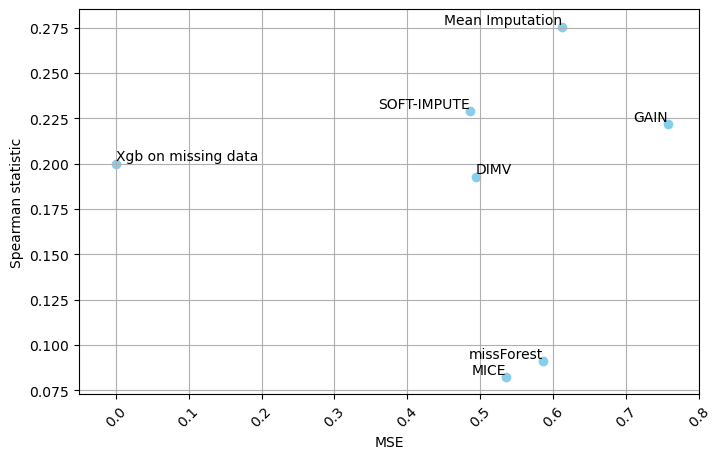

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Xgb on missing data') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.05, .8)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.359269,0.141627
Mean Imputation,0.366065,0.037529
MICE,0.386452,0.038734
DIMV,0.371169,0.035359
missForest,0.444970,0.042315
SOFT-IMPUTE,0.348753,0.036715
GAIN,0.426915,0.043703


imputation MSE versus Shapley MSE


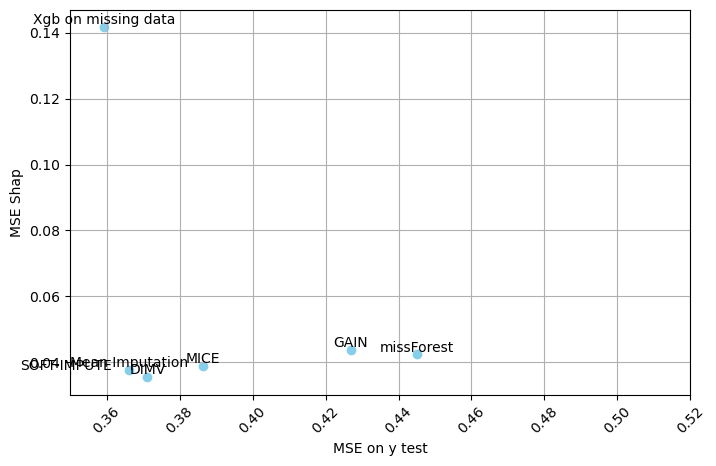

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(.35, .52)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.141627
Mean Imputation,0.612592,0.037529
MICE,0.535820,0.038734
DIMV,0.493851,0.035359
missForest,0.586473,0.042315
SOFT-IMPUTE,0.486009,0.036715
GAIN,0.757455,0.043703


imputation MSE versus Shapley MSE


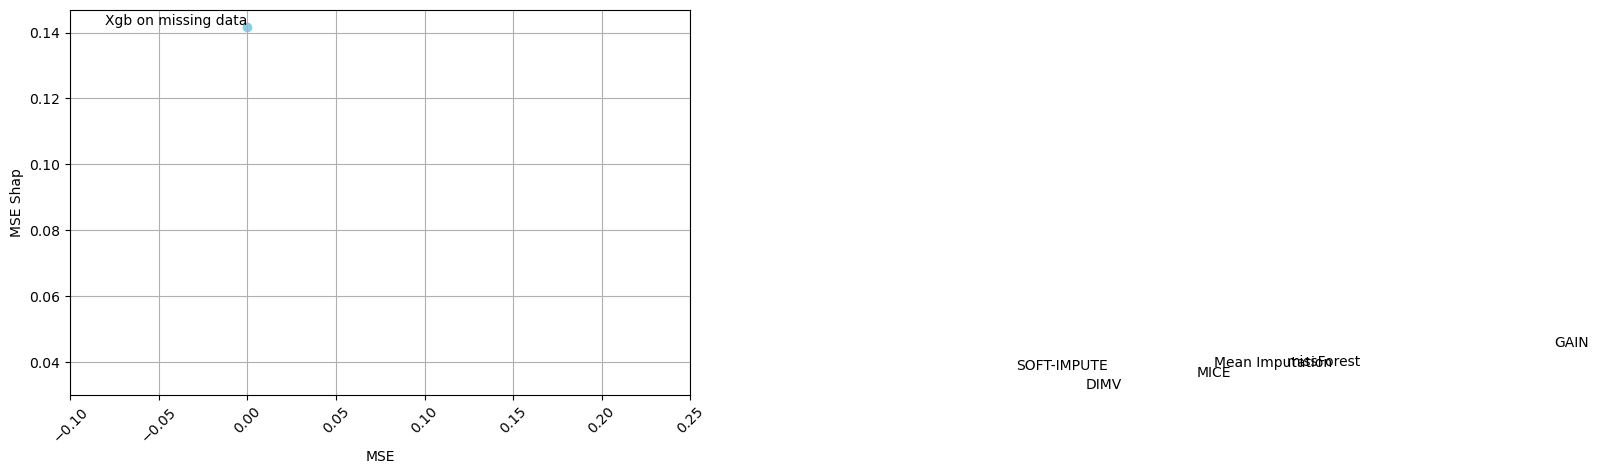

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, .25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

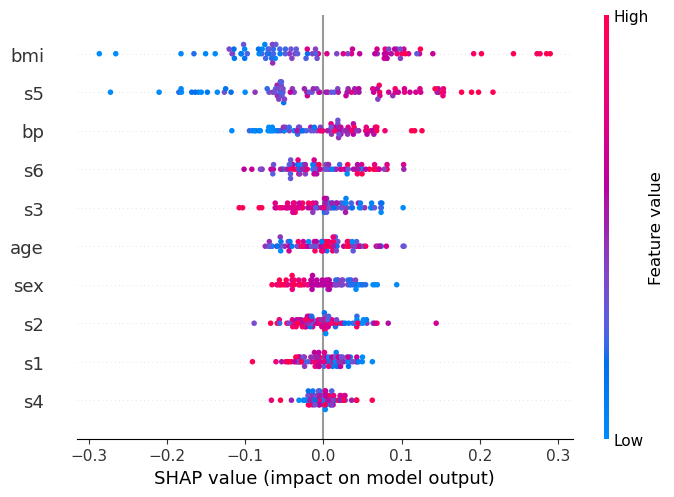

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

C:\Users\thung\.conda\envs\mtime\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


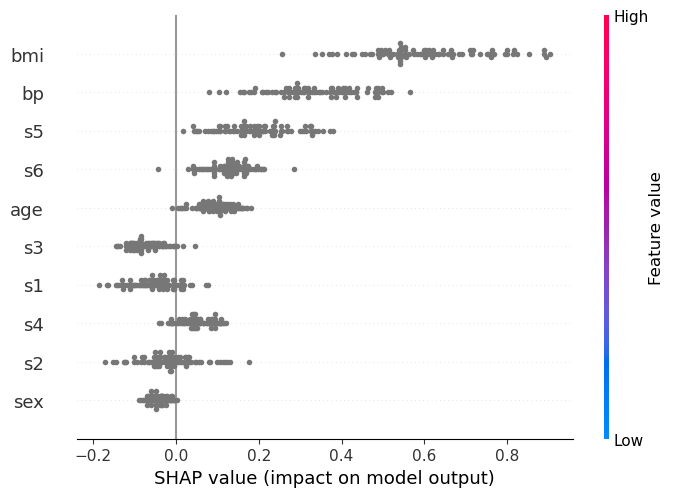

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

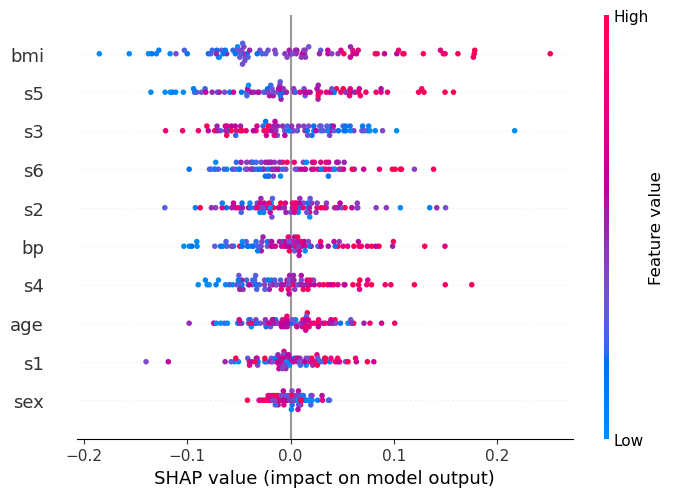

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

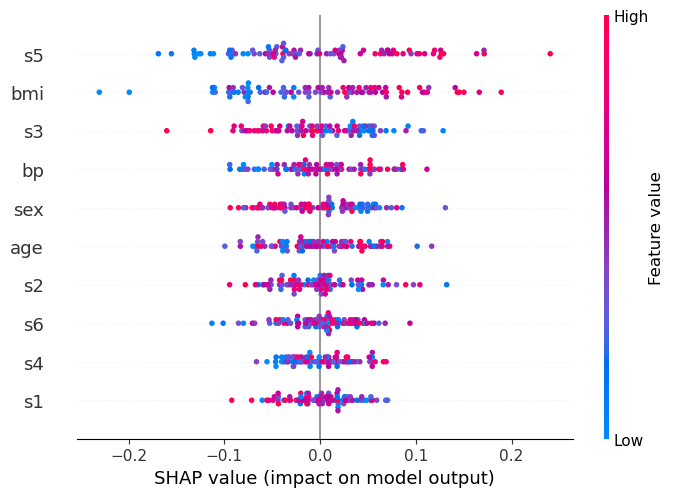

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

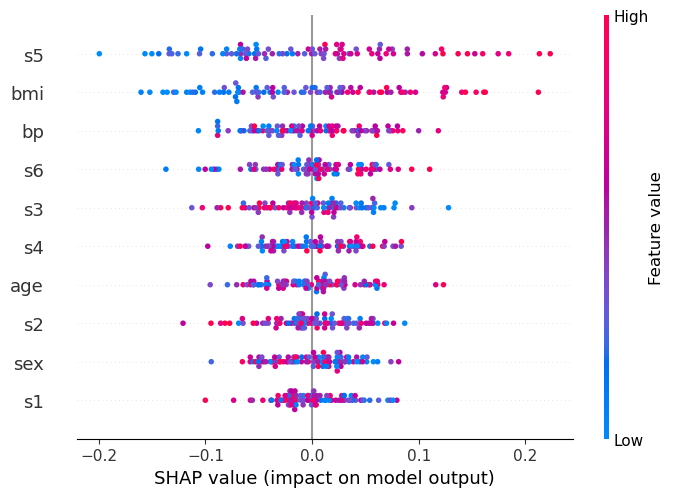

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

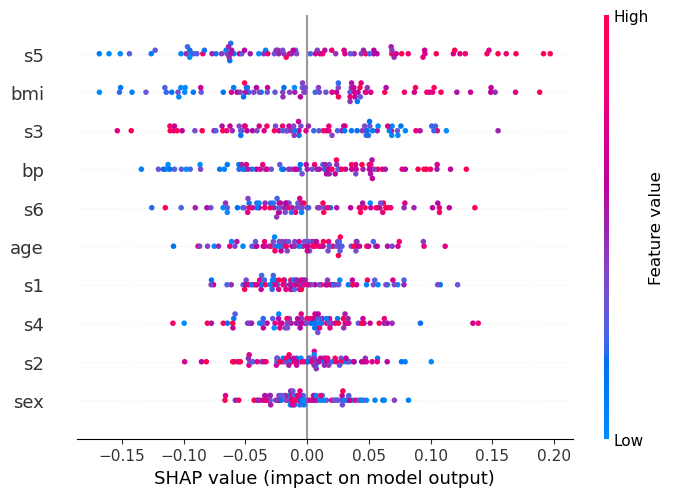

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

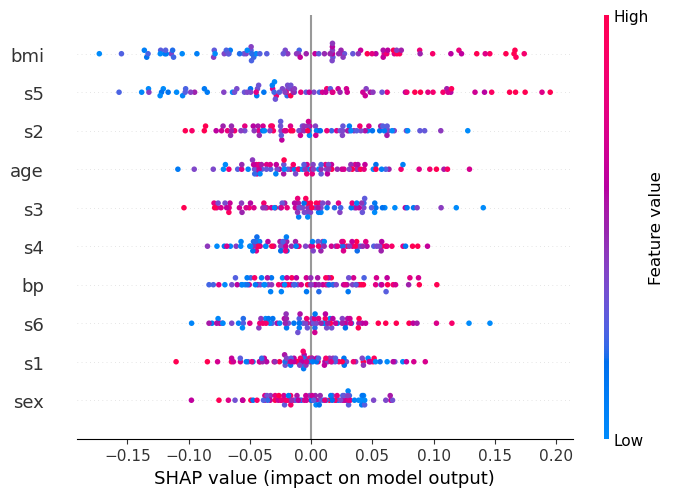

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

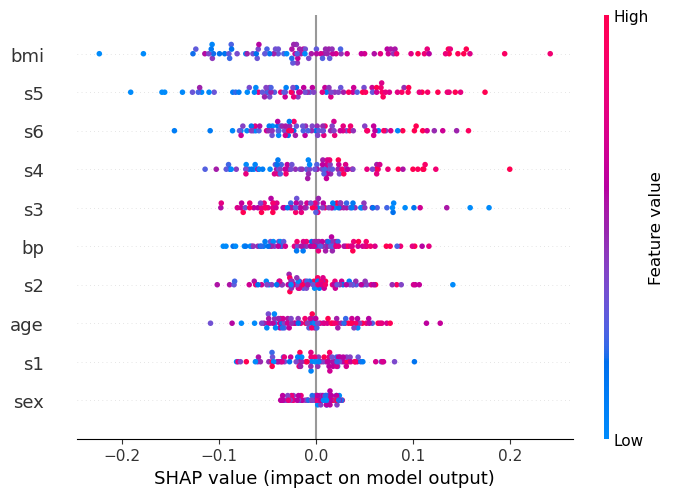

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

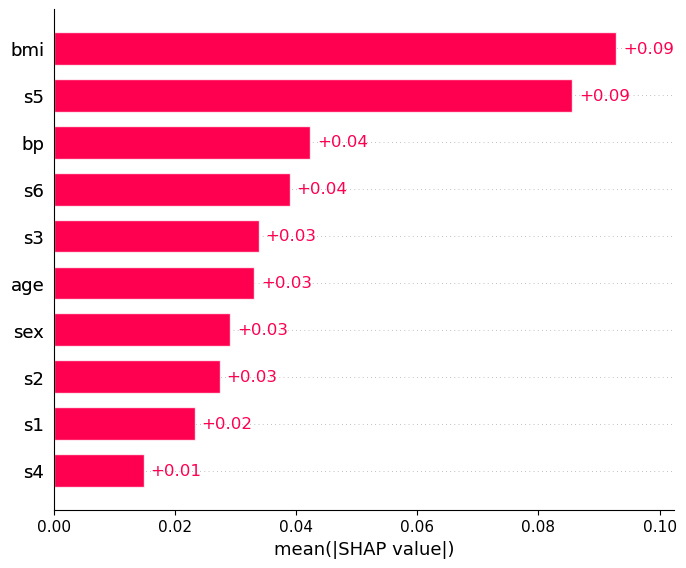

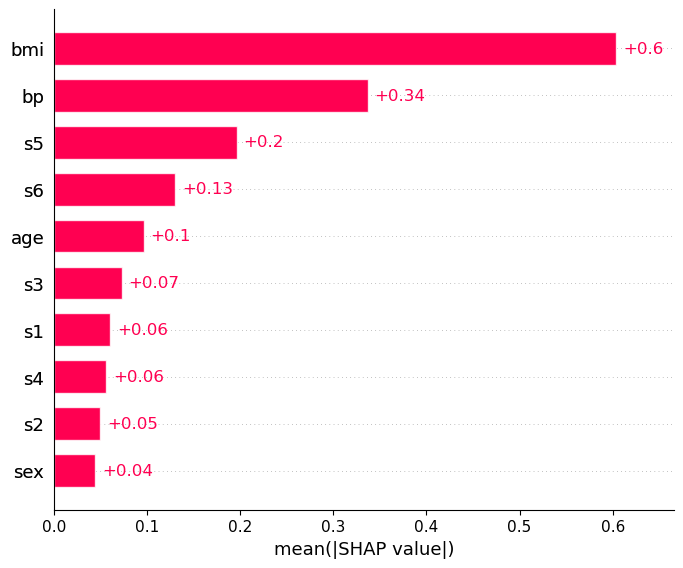

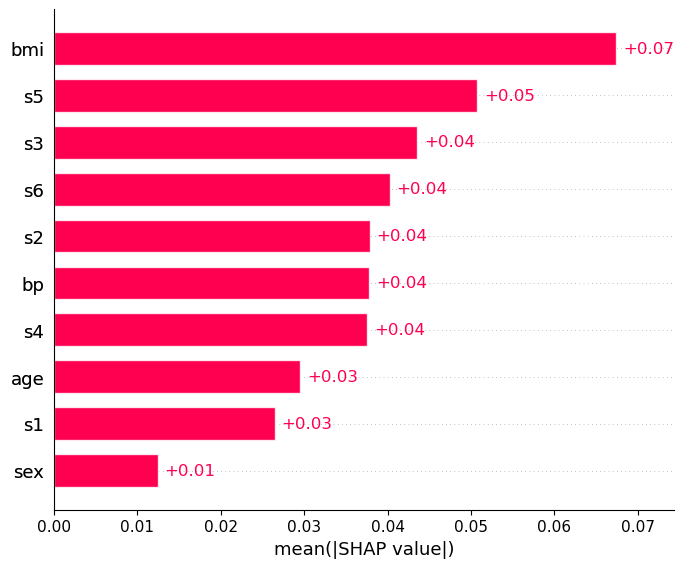

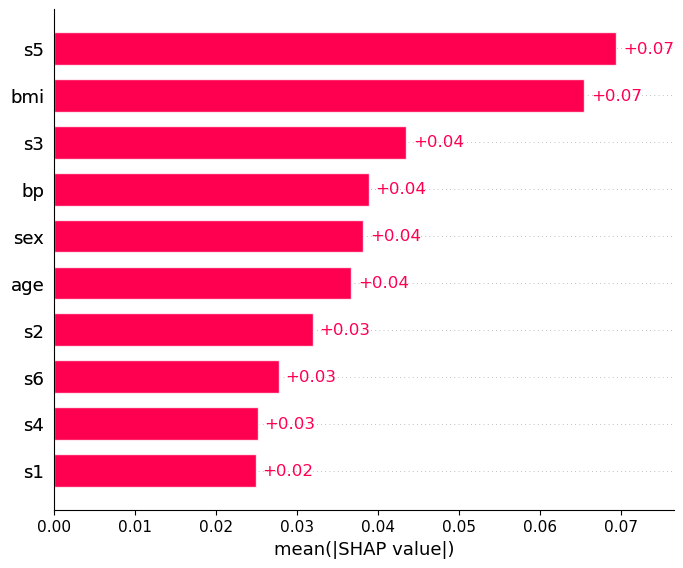

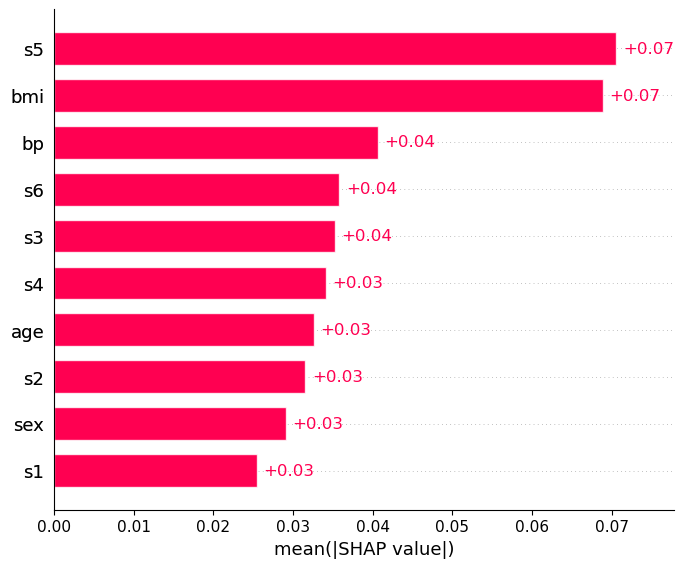

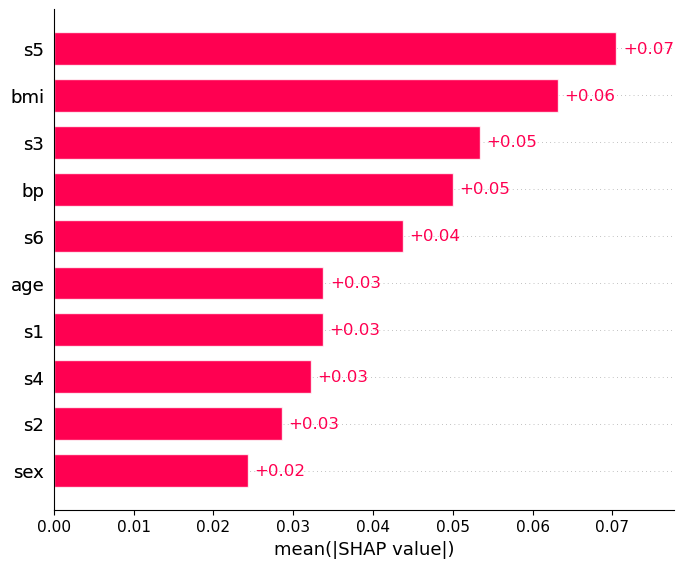

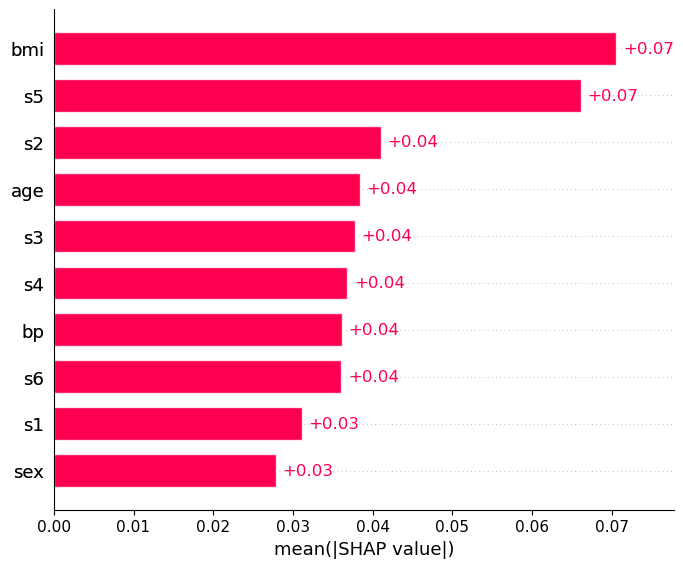

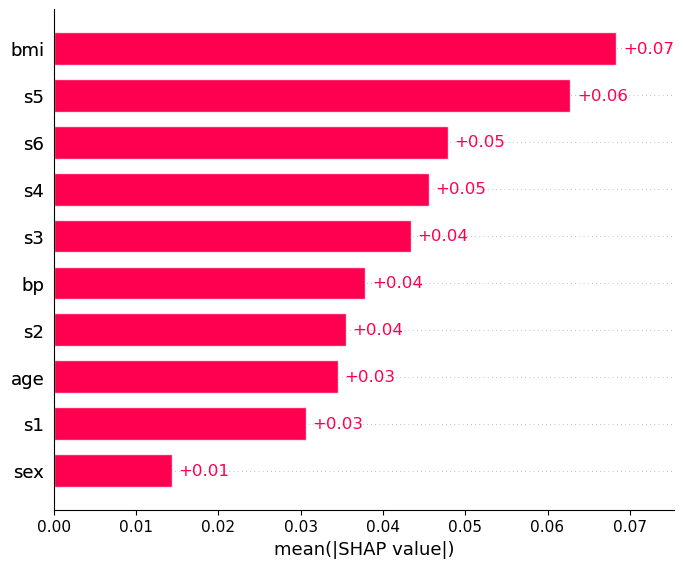

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')


<Figure size 6400x4800 with 0 Axes>

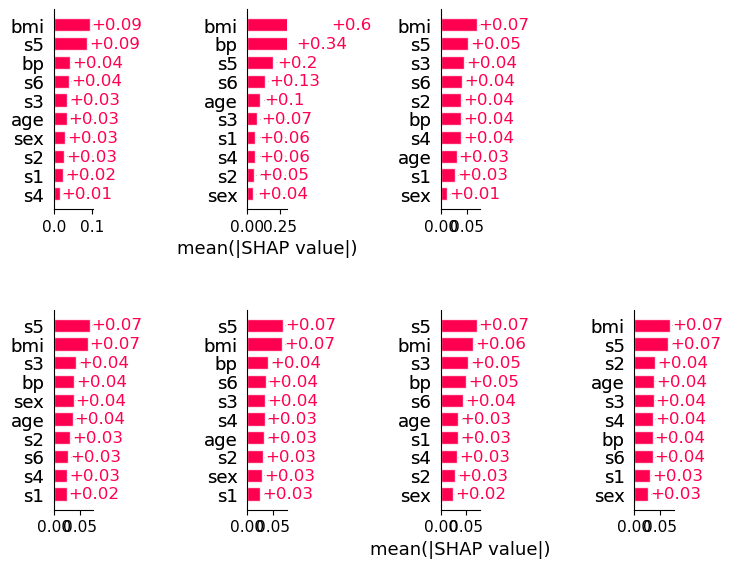

In [22]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_soft, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

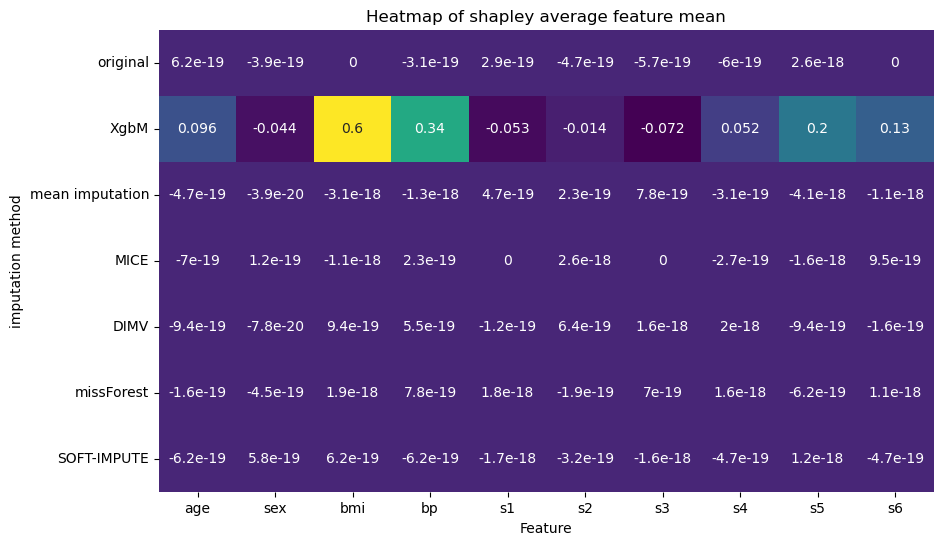

In [23]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()